# Исследование исторических данных о продажах игр, оценок пользователей и экспертов, жанров и платформ

# Цель: выявить определяющие успешность игры закономерности для 2017 года

## Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Пропущенны значения в следующих столбцах:\
Name - скорее всего необходимо удалить строки \
Year_of_Release - оставить как есть \
Genre - заполнить \
Critic_Score - заполнить медианой по жанру(возможно)\
User_Score - заполнить медианой по жанру(возможно), изменить тип данных, это оценка  \
Rating - возрастной рейтинг, оценить жанры на возможный рейтинг.  

## Шаг 2. Подготовьте данные

In [4]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### столбец user_score

In [5]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

'tbd' значит что данные еще не собраны.(to be determined = будет определено), думаю их стоит изменить на nan

In [6]:
data['user_score'] = data['user_score'].replace('tbd', '')

In [7]:
data['user_score'] = pd.to_numeric(data['user_score'])

### столбец name

In [8]:
data = data.dropna(subset = ['name'])

### столбец year_of_release

In [9]:
data['year_of_release'] = data['year_of_release'].fillna(0)
data['year_of_release'] = data['year_of_release'].astype('int')
for n in data['name'].unique():
    data.loc[((data['name'] == n) & (data['year_of_release'] == 0)), 'year_of_release'] = \
    data.loc[(data['name'] == n), 'year_of_release'].max()
data['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983,    0])

### столбец rating

In [10]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

пропуски тут, могут означать что игра не отрправлялась ESRB, можно заменить на "No"

In [11]:
data['rating'] = data['rating'].fillna('No')

### Удаление дубликатов

In [12]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [13]:
data.duplicated().sum()

0

### суммарные продажи

In [14]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

## Шаг 3. Проведите исследовательский анализ данных

<AxesSubplot:>

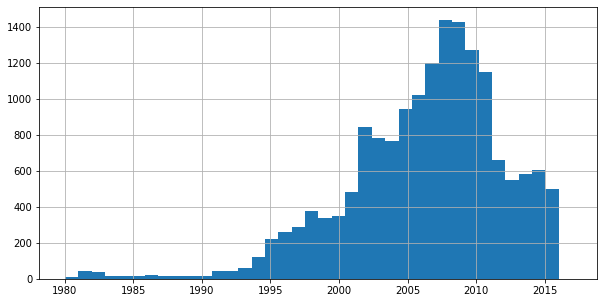

In [15]:
data['year_of_release'].hist(bins = data['year_of_release'].nunique(), range = (1980,2017), figsize = (10,5))

Возможно лучше взять данные с 2002 года поскольку с этого момента пошел "всплеск" популярности игр

###  как менялись продажи по платформам

In [16]:
a = data.pivot_table(index = 'platform', values='all_sales', aggfunc = 'sum')

In [17]:
a.sort_values(by = 'all_sales', ascending = False).head(10)

,all_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [18]:
b = data.pivot_table(index = 'year_of_release', columns = 'platform', 
                 values='all_sales', 
                 aggfunc = 'sum')
b = b[['PS2', 'X360', 'PS3', 'Wii', 'DS']]

<AxesSubplot:xlabel='year_of_release'>

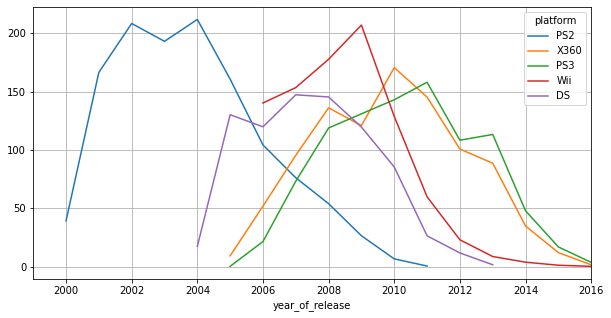

In [19]:
b.plot(xlim=(1999,2016),grid=True,figsize = (10,5))

срок жизни платформ с наибольшими суммарными продажами:\
PS2 - 11 лет\
X360 - 11 лет\
PS3 - 11 лет\
Wii - 9 лет\ 
DS - 9 лет\
Думаю, что средний срок жизни платформы 10 -11 лет. актуальный период можно взять половину от срока жизни платформ\
можно взять 4 года с 2013 года


In [20]:
data_2014 = data[data['year_of_release']>2013]

In [21]:
data_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1690 non-null   object 
 1   platform         1690 non-null   object 
 2   year_of_release  1690 non-null   int64  
 3   genre            1690 non-null   object 
 4   na_sales         1690 non-null   float64
 5   eu_sales         1690 non-null   float64
 6   jp_sales         1690 non-null   float64
 7   other_sales      1690 non-null   float64
 8   critic_score     719 non-null    float64
 9   user_score       889 non-null    float64
 10  rating           1690 non-null   object 
 11  all_sales        1690 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 171.6+ KB


In [22]:
max_sal_2014 = data_2014.pivot_table(index = 'platform', values='all_sales', aggfunc = 'sum')
max_sal_2014.sort_values(by = 'all_sales', ascending = False)

,all_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.40
PSV,22.40
Wii,5.07


<AxesSubplot:xlabel='year_of_release'>

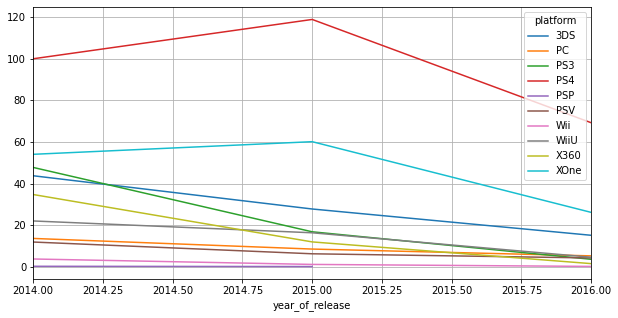

In [24]:
data_2014.pivot_table(index = 'year_of_release', columns = 'platform', 
                 values='all_sales', 
                 aggfunc = 'sum').plot(xlim=(2014,2016),grid=True,figsize = (10,5))


Наиболее популярными и актуальными платформами на 2016 год являются PS4 и XOne\
Популярность предыдущих поколений этих платформ снижается. Популярность остальных не меняется

<AxesSubplot:>

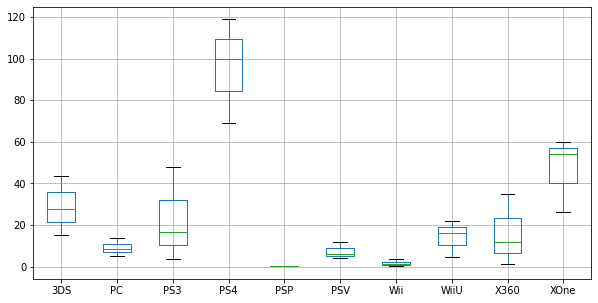

In [25]:
data_2014.pivot_table(index = 'year_of_release', columns = 'platform', 
                 values='all_sales', 
                 aggfunc = 'sum').boxplot(figsize = (10,5))

Рейтинг средней ежегодной выручки за 2013-2016 года распределился следующим образом: 
1. PS4 (с явным преимуществом)
2. XOne
3. 3DS
4. PS3
5. X360

### как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков на примере PS3

#### Оценки пользователей

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

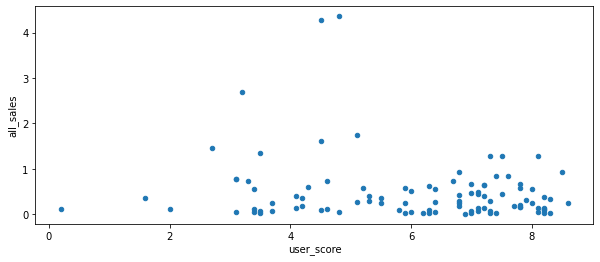

In [26]:
data_2014_PS3 = data_2014[data_2014['platform'] == 'PS3']
data_2014_PS3_1 = data_2014_PS3.dropna(subset = ['user_score'])

data_2014_PS3_1.plot(x = 'user_score', y = 'all_sales', kind = 'scatter',
                                            figsize = (10,4))

In [27]:
print('Корреляция ровна ', data_2014_PS3_1['user_score'].corr(data_2014_PS3_1['all_sales']))

Корреляция ровна  -0.16676141347662118


Наблюдается отрицательная зависимость между оценками пользователей и продажами, однако она не значительна, это может быть связано с тем, что наиболее популярные игры(с большим количеством продаж) имеют оценки от 6 до 9. Грубо говоря, чем больше продаж, тем больше оценок как положительных, так и отрицательных, тем ниже средний результат. 

#### Оценки критиков

<AxesSubplot:xlabel='critic_score', ylabel='all_sales'>

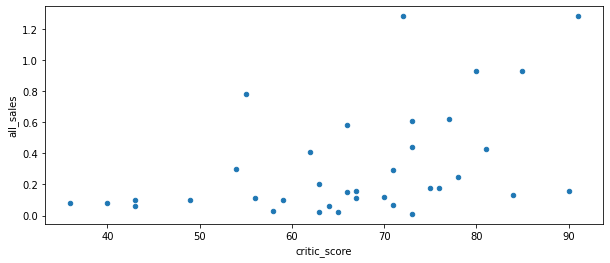

In [30]:
data_2014_PS3.plot(x = 'critic_score', y = 'all_sales', kind = 'scatter',
                                            figsize = (10,4))

In [31]:
data_2014_PS3_2 = data_2014_PS3.dropna(subset = ['critic_score'])
print('Корреляция ровна ', data_2014_PS3_2['critic_score'].corr(data_2014_PS3_1['all_sales']))

Корреляция ровна  0.44657460493190704


Наблюдается значительная положительная зависимость между оценками критиков и количествами продаж. Это объясняет желание разработчиков угождать критикам в новых веяниях.  

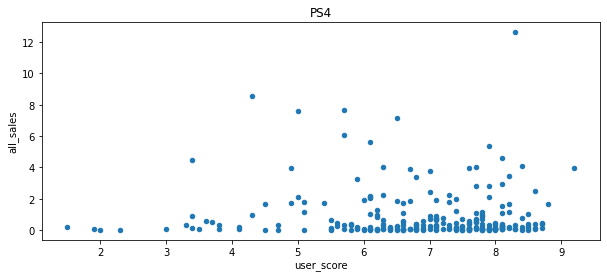

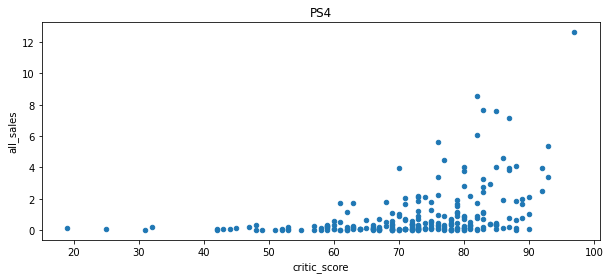

PS4 Корреляция продаж и оценок пользователей ровна  -0.040131589472697356
PS4 Корреляция продаж и оценок критиков ровна  0.40190287811475334



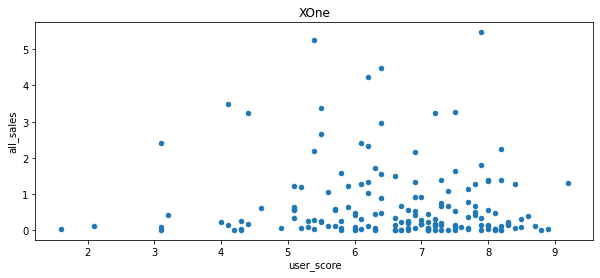

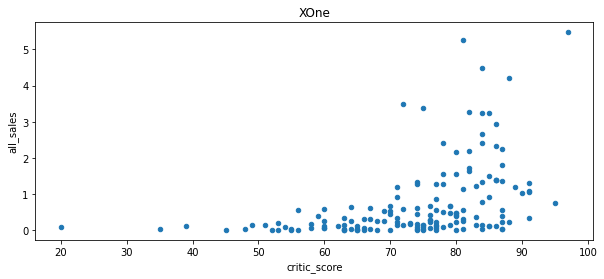

XOne Корреляция продаж и оценок пользователей ровна  -0.0703839280647581
XOne Корреляция продаж и оценок критиков ровна  0.42211185105557647



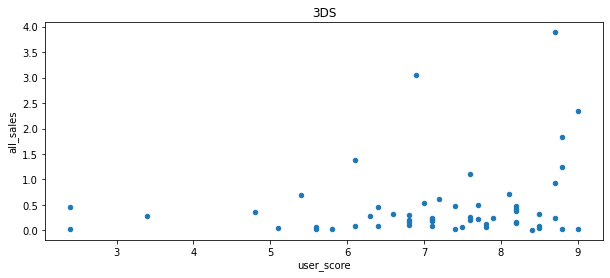

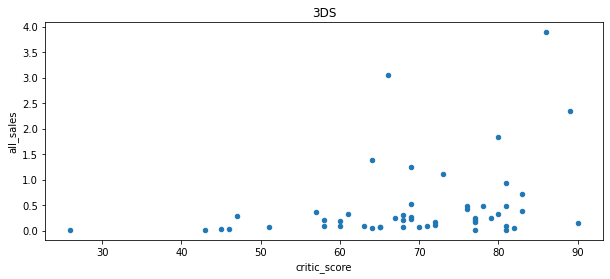

3DS Корреляция продаж и оценок пользователей ровна  0.2151932718527028
3DS Корреляция продаж и оценок критиков ровна  0.28468579095782925



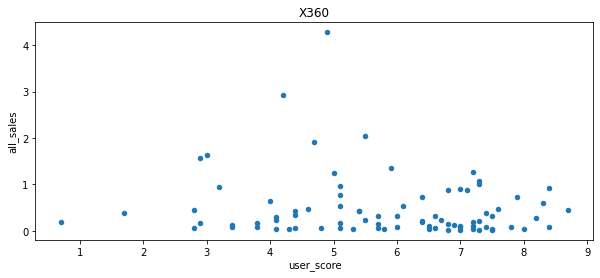

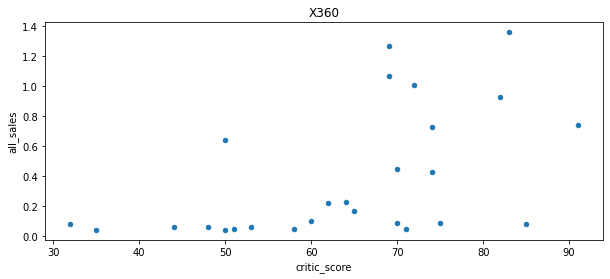

X360 Корреляция продаж и оценок пользователей ровна  -0.138444570945665
X360 Корреляция продаж и оценок критиков ровна  0.5257228356581523



In [39]:
platforms = ['PS4', 'XOne',  '3DS',  'X360' ]
for plat in platforms:
    data_2014_plat = data_2014[data_2014['platform'] == plat]
    data_2014_plat_1 = data_2014_plat.dropna(subset = ['user_score'])
    data_2014_plat_2 = data_2014_plat.dropna(subset = ['critic_score'])
    data_2014_plat_1.plot(x = 'user_score', y = 'all_sales', kind = 'scatter',
                                            figsize = (10,4), title = plat)
    plt.show()
    data_2014_plat_2.plot(x = 'critic_score', y = 'all_sales', kind = 'scatter',
                                            figsize = (10,4), title = plat)
    plt.show()
    print(plat, 'Корреляция продаж и оценок пользователей ровна ', data_2014_plat_1['user_score'].corr(data_2014_plat_1['all_sales']))
    print(plat, 'Корреляция продаж и оценок критиков ровна ', data_2014_plat_2['critic_score'].corr(data_2014_plat_1['all_sales']))
    print()
    

Данная ситуация аналогична и на других платформа, оценки критиков куда значительнее влияют на количество продаж, нежели оценки пользователей, только у платформы 3DS ситуация немного отличается, оценки критиков и пользователей одинаково мало влияют на продажи.

#### Продажи по жанрам

In [40]:
gn = data_2014.groupby('genre')['all_sales'].sum().reset_index().sort_values(by ='all_sales', ascending = False)
gn

,genre,all_sales
0,Action,199.71
8,Shooter,170.94
10,Sports,109.48
7,Role-Playing,101.44
3,Misc,37.55
2,Fighting,28.22
6,Racing,27.52
4,Platform,18.09
1,Adventure,17.55
9,Simulation,13.13


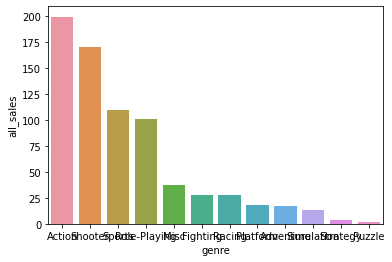

In [41]:
g = sns.barplot(x = 'genre', y = 'all_sales', data = gn,)
sns.set(rc={'figure.figsize':(12,5)})

наиболее популярные и прибыльные жанры:
1. Action
2. Shooter
3. Sports
4. Role-Playing

## Шаг 4. Составьте портрет пользователя каждого региона

### NA

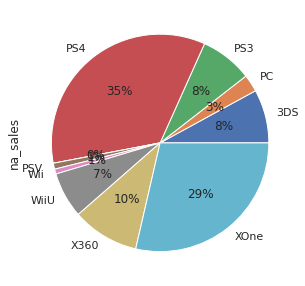

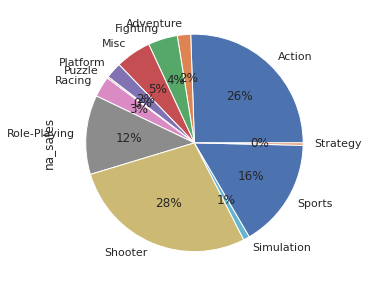

In [42]:
pop_pl = data_2014.pivot_table(index = 'platform', 
                 values=['na_sales', 'eu_sales','jp_sales', 'other_sales'], 
                 aggfunc = 'sum')
pop_gn = data_2014.pivot_table(index = 'genre', 
                 values=['na_sales', 'eu_sales','jp_sales', 'other_sales'], 
                 aggfunc = 'sum')
pop_ESRB = data_2014.pivot_table(index = 'rating', 
                 values=['na_sales', 'eu_sales','jp_sales', 'other_sales'], 
                 aggfunc = 'sum')


pop_pl['na_sales'].plot(kind='pie', figsize=(5,5), autopct='%1.0f%%')
plt.show()
pop_gn['na_sales'].plot(kind='pie', figsize=(5,5), autopct='%1.0f%%');
plt.show()


В США наибольшей популярностью пользуются следующие платформы: ps4, XOne, PS3, XD360, 3DS;\
следующие жанры: Action, Shooter, Sports, Role-Playing, Music;

### EU

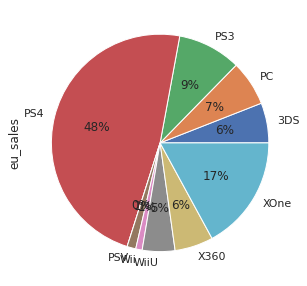

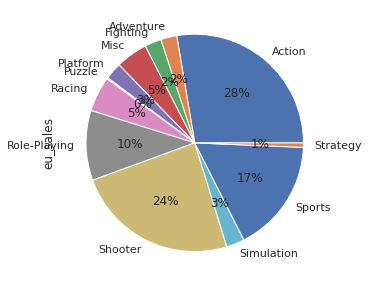

In [43]:
pop_pl['eu_sales'].plot(kind='pie', figsize=(5,5), autopct='%1.0f%%')
plt.show()
pop_gn['eu_sales'].plot(kind='pie', figsize=(5,5), autopct='%1.0f%%');
plt.show()


В Европе наибольшей популярностью пользуются следующие платформы: ps4,PS3, XOne, XD360, 3DS;\
следующие жанры: Action, Shooter, Sports, Role-Playing, Music и Racing;

### JP

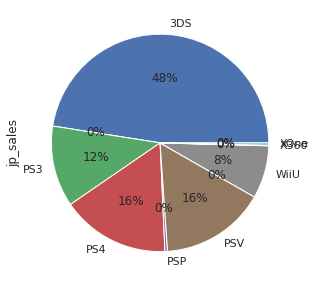

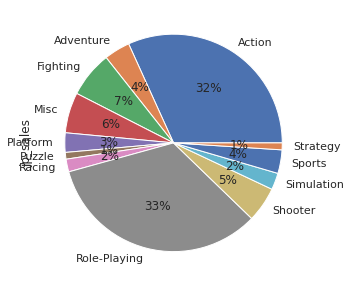

In [44]:
pop_pl['jp_sales'].plot(kind='pie', figsize=(5,5), autopct='%1.0f%%')
plt.show()
pop_gn['jp_sales'].plot(kind='pie', figsize=(5,5), autopct='%1.0f%%');
plt.show()
#pop_ESRB['jp_sales'].plot(kind='pie', figsize=(5,5), autopct='%1.1f%%');

В Японии ситуация сильно отличается, наибольшей популярностью пользуются следующие платформы:3DS, PS3, ps4, PSV, WiiU;\
следующие жанры: Role-Playing, Action, Music, Fighting, Shooter;

### other

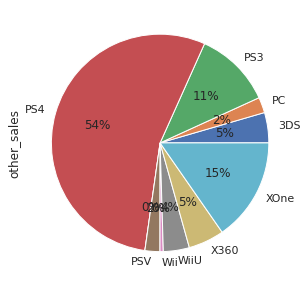

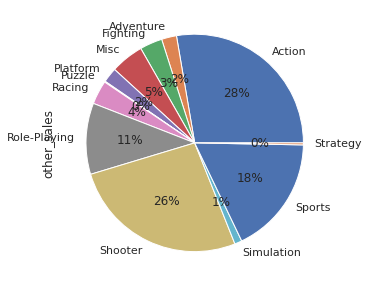

In [45]:
pop_pl['other_sales'].plot(kind='pie', figsize=(5,5), autopct='%1.0f%%')
plt.show()
pop_gn['other_sales'].plot(kind='pie', figsize=(5,5), autopct='%1.0f%%');
plt.show()
#pop_ESRB['other_sales'].plot(kind='pie', figsize=(5,5), autopct='%1.1f%%');

По другим странам наибольшей популярностью пользуются следующие платформы: ps4, PS3, XOne, XD360, 3DS;\
следующие жанры: Action, Shooter, Sports, Role-Playing, Musiс. 

### ESRB

In [46]:
pop_ESRB = pop_ESRB.reset_index()
pop_ESRB

,rating,eu_sales,jp_sales,na_sales,other_sales
0,E,58.06,8.94,50.74,15.39
1,E10+,26.16,4.46,33.23,7.83
2,M,93.69,8.01,96.48,28.71
3,No,58.95,56.90,64.72,18.40
4,T,34.07,14.78,38.95,11.33


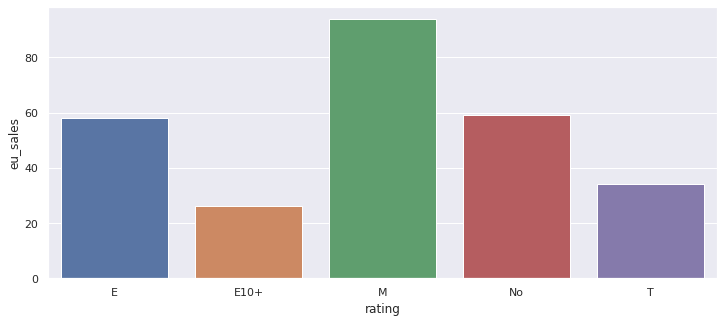

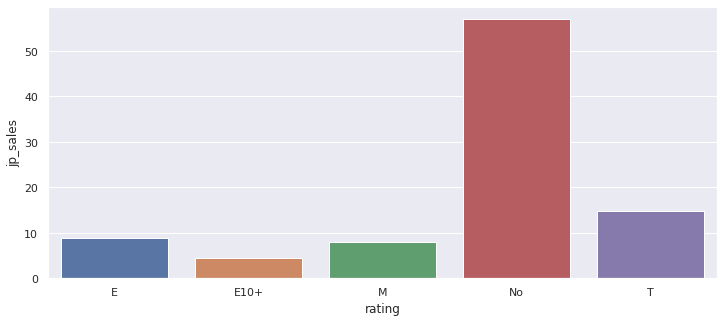

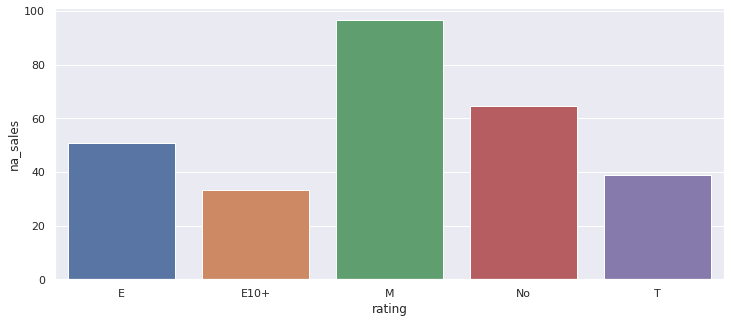

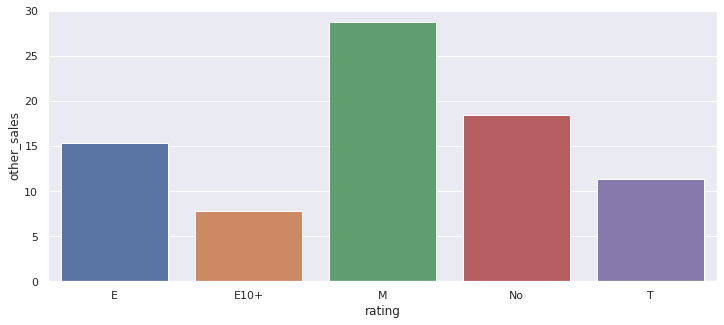

In [47]:
sns.barplot(x = 'rating', y = 'eu_sales', data = pop_ESRB)
plt.show()
sns.barplot(x = 'rating', y = 'jp_sales', data = pop_ESRB)
plt.show()
sns.barplot(x = 'rating', y = 'na_sales', data = pop_ESRB)
plt.show()
sns.barplot(x = 'rating', y = 'other_sales', data = pop_ESRB)
sns.set(rc={'figure.figsize':(12,5)})

по рейтингу ESRB самый популярный рейтинг "М" по всем странам, кроме Японии. В Японии наибольшие продажи у игр без рейтинга. 

## Шаг 5. Проверьте гипотезы

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Н0: Средние пользовательские рейтинги Xbox One = средним пользовательским рейтингам PC;\
Н1: Средние пользовательские рейтинги Xbox One ≠ средним пользовательским рейтингам PC;

In [48]:
Xbox_One = data_2014[data_2014['platform'] == 'XOne']
Xbox_One = Xbox_One.dropna(subset = ['user_score'])
Xbox_One = Xbox_One['user_score']
PC = data_2014[data_2014['platform'] == 'PC']
PC = PC.dropna(subset = ['user_score'])
PC = PC['user_score']
alpha = 0.05
results = st.ttest_ind(Xbox_One, PC, equal_var = False)

print(results.pvalue)

if (results.pvalue  < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.139237120435483
Не получилось отвергнуть нулевую гипотезу


поскольку не получилось отвергнуть нулевую гипотезу, можно сделать вывод, что:\
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Н0: Средние пользовательские рейтинги Action = средним пользовательским рейтингам Sports;\
Н1: Средние пользовательские рейтинги Action ≠ средним пользовательским рейтингам Sports;

In [49]:
Action = data_2014[data_2014['genre'] == 'Action']
Action = Action.dropna(subset = ['user_score'])
Action = Action['user_score']
Sports = data_2014[data_2014['genre'] == 'Sports']
Sports = Sports.dropna(subset = ['user_score'])
Sports = Sports['user_score']
alpha = 0.05
results = st.ttest_ind(Action, Sports, equal_var = False)

print(results.pvalue)

if (results.pvalue  < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

9.658176026869598e-15
Отвергаем нулевую гипотезу


Поскольку мы отвергли нулевую гипотезу о равенстве рейтингов то, можно сделать заключение, что:\
Средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод

С 2002 года пошел "всплеск" разработки игр\
Срок жизни платформ с наибольшими суммарными продажами:\
PS2 - 11 лет\
X360 - 11 лет\
PS3 - 11 лет\
Wii - 9 лет\
DS - 9 лет

Актуальный период для прогноза с 2013 года.\
Наиболее популярными и актуальными платформами на 2016 год являются PS4 и XOne\
Популярность предыдущих поколений этих платформ снижается. Популярность остальных не меняется\
Рейтинг средней ежегодной выручки за 2013-2016 года распределился следующим образом: 1.	PS4 (с явным преимуществом), 2.	XOne, 3.3DS, 4.	PS3, 5.	X360

Наблюдается положительная зависимость между оценками пользователей и продажами, однако она не значительна, это может быть связано с тем, что наиболее популярные игры(с большим количеством продаж) имеют оценки от 6 до 9. Грубо говоря, чем больше продаж, тем больше оценок как положительных, так и отрицательных, тем ниже средний результат.

Наблюдается значительная положительная зависимость между оценками критиков и количествами продаж. Это объясняет желание разработчиков угождать критикам в новых веяниях.

Данная ситуация аналогична и на других платформа, оценки критиков куда значительнее влияют на количество продаж, нежели оценки пользователей.

Наиболее популярные и прибыльные жанры: 1.	Action, 2.	Shooter, 3.	Sports, 4.	Role-Playing

В США наибольшей популярностью пользуются следующие платформы: ps4, XOne, PS3, XD360, 3DS; и следующие жанры: Action, Shooter, Sports, Role-Playing, Music;\
В Европе наибольшей популярностью пользуются следующие платформы: ps4,PS3, XOne, XD360, 3DS; и следующие жанры: Action, Shooter, Sports, Role-Playing, Music и Racing;\
В Японии ситуация сильно отличается, наибольшей популярностью пользуются следующие платформы:3DS, PS3, ps4, PSV, WiiU; и следующие жанры: Role-Playing, Action, Music, Fighting, Shooter;\
По другим странам наибольшей популярностью пользуются следующие платформы: ps4, PS3, XOne, XD360, 3DS; и следующие жанры: Action, Shooter, Sports, Role-Playing, Musiс.\
по рейтингу ESRB самый популярный рейтинг "М" по всем странам, кроме Японии. В японии наибольшие продажи у игр без рейтинга.

При проверке гипотез выяснилось:\
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые\
Средние пользовательские рейтинги жанров Action и Sports разные.
